In [ ]:
from google.colab import drive

# This will prompt you to upload files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
file_path = '/content/drive/My Drive/netflix_titles.csv'
df = pd.read_csv(file_path)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#length of data
len(df)

8807

In [ ]:
#statistical summary of the data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:
#checking datatypes
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#number of unique values in the data
for i in df.columns:
  print(i,':', df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


##Data Cleaning

In [ ]:
#checking null values in every column of the data
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

3 missing values are found in duration column , and it is also found that by mistake those data got entered in rating column

In [ ]:
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
ind = df[df['duration'].isna()].index

In [ ]:
df.loc[ind] = df.loc[ind].fillna(method = 'ffill' , axis = 1)

In [ ]:
# replacing the wrong entries in the rating column
df.loc[ind ,'rating'] = 'Not Available'

In [ ]:
df.loc[ind]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Not Available,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Not Available,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Not Available,66 min,Movies,The comic puts his trademark hilarious/thought...


##Filling the null values in the rating column

In [ ]:
df[df.rating.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
null_rating_indices = df[df['rating'].isna()].index

In [ ]:
df.loc[null_rating_indices, 'rating'] = 'Not Available'
df.loc[null_rating_indices]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,Not Available,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,Not Available,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,Not Available,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,Not Available,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Not Available', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

###Here we can see that UR(unrated) is same as NR(Not Rated), let's change it to NR only

In [ ]:
df.loc[df['rating'] == 'UR', 'rating'] = "NR"
df['rating'].value_counts()

rating
TV-MA            3207
TV-14            2160
TV-PG             863
R                 799
PG-13             490
TV-Y7             334
TV-Y              307
PG                287
TV-G              220
NR                 83
G                  41
Not Available       7
TV-Y7-FV            6
NC-17               3
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

###dropping the null values from date_added column

In [ ]:
df.drop(df.loc[df['date_added'].isna()].index, axis = 0, inplace = True)

###Changing the dtye of date_added into datetime

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], format = 'mixed')
df['date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-24
4      2021-09-24
          ...    
8802   2019-11-20
8803   2019-07-01
8804   2019-11-01
8805   2020-01-11
8806   2019-03-02
Name: date_added, Length: 8797, dtype: datetime64[ns]

###Adding the new columns year, month from date_added column

In [ ]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df[['date_added', 'month_added', 'year_added']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8797 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_added   8797 non-null   datetime64[ns]
 1   month_added  8797 non-null   int32         
 2   year_added   8797 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 206.2 KB


#Non-Graphical Analysis

In [ ]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

###2 types of content is present in the dataset

In [ ]:
movies = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']

In [ ]:
movies['duration'].value_counts()

duration
90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
191 min      1
Name: count, Length: 205, dtype: int64

In [ ]:
tv_shows['duration'].value_counts()

duration
1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: count, dtype: int64

####movies and tv shows have different format for duration, changing duration for movies as minutes and tv shows as number of seasons

In [ ]:
movies['duration'] = movies['duration'].str[:-3].astype('float')
movies['duration']

<ipython-input-309-d9ca18fad28b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str[:-3].astype('float')


0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration, Length: 6131, dtype: float64

In [ ]:
tv_shows['duration'] = tv_shows['duration'].str[:-7].apply(lambda x: x.strip()).astype('float')
tv_shows['duration']

<ipython-input-310-e8ebbb836a57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['duration'] = tv_shows['duration'].str[:-7].apply(lambda x: x.strip()).astype('float')


1       2.0
2       1.0
3       1.0
4       2.0
5       1.0
       ... 
8795    2.0
8796    2.0
8797    3.0
8800    1.0
8803    2.0
Name: duration, Length: 2666, dtype: float64

In [ ]:
movies.rename(columns = {'duration': 'duration_in_minutes'}, inplace = True)
tv_shows.rename(columns = {'duration': 'duration_in_seasons'}, inplace = True)

<ipython-input-311-75675410ab71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.rename(columns = {'duration': 'duration_in_minutes'}, inplace = True)
<ipython-input-311-75675410ab71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows.rename(columns = {'duration': 'duration_in_seasons'}, inplace = True)


In [ ]:
movies.duration_in_minutes

0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration_in_minutes, Length: 6131, dtype: float64

In [ ]:
tv_shows.duration_in_seasons

1       2.0
2       1.0
3       1.0
4       2.0
5       1.0
       ... 
8795    2.0
8796    2.0
8797    3.0
8800    1.0
8803    2.0
Name: duration_in_seasons, Length: 2666, dtype: float64

Getting the first and latest dates of movies and tv shows for netflix

In [ ]:
movies_timerange= pd.Series((movies.date_added.min().strftime('%B %Y'), movies.date_added.max().strftime('%B %Y')))
movies_timerange.index = ['First', 'Latest']
movies_timerange

First       January 2008
Latest    September 2021
dtype: object

In [ ]:
tvshows_timerange = pd.Series((tv_shows.date_added.min().strftime('%B %Y'), tv_shows.date_added.max().strftime('%B %Y')))
tvshows_timerange.index = ['First', 'Latest']
tvshows_timerange

First      February 2008
Latest    September 2021
dtype: object

The first and the latest movie/TV show release year

In [ ]:
df.release_year.min(), df.release_year.max()

(1925, 2021)

In [ ]:
df.loc[(df.release_year == df.release_year.min()) | (df.release_year == df.release_year.max())].sort_values('release_year').head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,2018,12
966,s967,Movie,Get the Grift,Pedro Antonio,"Marcus Majella, Samantha Schmütz, Caito Mainie...",Brazil,2021-04-28,2021,TV-MA,95 min,"Comedies, International Movies","After a botched scam, Clóvis bumps into Lohane...",2021,4
967,s968,TV Show,Headspace Guide to Sleep,NaN,Evelyn Lewis Prieto,NaN,2021-04-28,2021,TV-G,1 Season,"Docuseries, Science & Nature TV",Learn how to sleep better with Headspace. Each...,2021,4
968,s969,TV Show,Sexify,NaN,"Aleksandra Skraba, Maria Sobocińska, Sandra Dr...",Poland,2021-04-28,2021,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",To build an innovative sex app and win a tech ...,2021,4
972,s973,TV Show,Fatma,NaN,"Burcu Biricik, Uğur Yücel, Mehmet Yılmaz Ak, H...",Turkey,2021-04-27,2021,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Thrillers","Reeling from tragedy, a nondescript house clea...",2021,4


In [ ]:
round((df.isna().sum()/ df.shape[0])*100)

show_id          0.0
type             0.0
title            0.0
director        30.0
cast             9.0
country          9.0
date_added       0.0
release_year     0.0
rating           0.0
duration         0.0
listed_in        0.0
description      0.0
year_added       0.0
month_added      0.0
dtype: float64

we can see that country, cast, country are only and have some high amount of nulls

In [ ]:
#Working on Country Column
df['country'].value_counts()

country
United States                             2812
India                                      972
United Kingdom                             418
Japan                                      244
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

There are movies/tv shows which are made in multiple countries
This makes it difficult to analyse how many movies/tvshows were produced in each country. We can use explode function in pandas to split the country column into different rows.
Creating a separate table for country , to avoid the duplicate records in our origional table after exploding.

In [ ]:
country_db = df[['show_id' , 'type' , 'country']]
country_db.dropna(inplace = True)
country_db['country'] = country_db['country'].apply(lambda x : x.split(','))
country_db = country_db.explode('country')
country_db

<ipython-input-320-ad223bed08f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_db.dropna(inplace = True)
<ipython-input-320-ad223bed08f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_db['country'] = country_db['country'].apply(lambda x : x.split(','))


,show_id,type,country
0,s1,Movie,United States
1,s2,TV Show,South Africa
4,s5,TV Show,India
7,s8,Movie,United States
7,s8,Movie,Ghana
...,...,...,...
8801,s8802,Movie,Jordan
8802,s8803,Movie,United States
8804,s8805,Movie,United States
8805,s8806,Movie,United States


In [ ]:
country_db['country'] = country_db['country'].str.strip()

In [ ]:
country_db.loc[country_db['country'] == '']

,show_id,type,country
193,s194,TV Show,
365,s366,Movie,
1192,s1193,Movie,
2224,s2225,Movie,
4653,s4654,Movie,
5925,s5926,Movie,
7007,s7008,Movie,


In [ ]:
country_db = country_db.loc[country_db['country'] != '']
country_db['country'].nunique()

122

Movies/TV shows are from total 122 countries

Let's see how many total movies/tv shows are in each country

In [ ]:
x = country_db.groupby(['country','type'])['show_id'].count().reset_index()

In [ ]:
x.pivot(index = 'country', columns = 'type', values = 'show_id').sort_values('TV Show', ascending = False)

type,Movie,TV Show
country,,
United States,2752.0,932.0
United Kingdom,534.0,271.0
Japan,119.0,198.0
South Korea,61.0,170.0
Canada,319.0,126.0
...,...,...
Uganda,1.0,NaN
Vatican City,1.0,NaN
Venezuela,4.0,NaN


#Cast Column

In [ ]:
cast_tb = df[['show_id', 'type', 'cast']]
cast_tb.dropna(inplace = True)

<ipython-input-326-23982cddd82d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast_tb.dropna(inplace = True)


In [ ]:
cast_tb.head()

,show_id,type,cast
1,s2,TV Show,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban..."
2,s3,TV Show,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi..."
4,s5,TV Show,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K..."
5,s6,TV Show,"Kate Siegel, Zach Gilford, Hamish Linklater, H..."
6,s7,Movie,"Vanessa Hudgens, Kimiko Glenn, James Marsden, ..."


####Here the cast column has multiple values, we need to split them up and explode it to find the number of unique actor in the cast

In [ ]:
cast_tb['cast'] = cast_tb['cast'].apply(lambda x: x.split(','))
cast_tb = cast_tb.explode('cast')
cast_tb

<ipython-input-328-f98e8acc6ae5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cast_tb['cast'] = cast_tb['cast'].apply(lambda x: x.split(','))


,show_id,type,cast
1,s2,TV Show,Ama Qamata
1,s2,TV Show,Khosi Ngema
1,s2,TV Show,Gail Mabalane
1,s2,TV Show,Thabang Molaba
1,s2,TV Show,Dillon Windvogel
...,...,...,...
8806,s8807,Movie,Manish Chaudhary
8806,s8807,Movie,Meghna Malik
8806,s8807,Movie,Malkeet Rauni
8806,s8807,Movie,Anita Shabdish


In [ ]:
#Removing unwanted spaces
cast_tb['cast'] = cast_tb['cast'].str.strip()

In [ ]:
#checking for empty strings
cast_tb[cast_tb['cast'] == '']

,show_id,type,cast


####there are no empty values

In [ ]:
cast_tb['cast'].nunique()

36403

In [ ]:
# Total movies/TV shows by each actor
x = cast_tb.groupby(['cast' , 'type'])['show_id'].count().reset_index()
x.pivot(index = 'cast' , columns = 'type' , values = 'show_id').sort_values('TV Show' , ascending = False).head()

type,Movie,TV Show
cast,,
Takahiro Sakurai,7.0,25.0
Yuki Kaji,10.0,19.0
Junichi Suwabe,4.0,17.0
Daisuke Ono,5.0,17.0
Ai Kayano,2.0,17.0




*   Director Column



In [ ]:
df['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

In [ ]:
dir_tb = df[['type', 'show_id', 'director']]
dir_tb.dropna(inplace = True)
dir_tb['director'] = dir_tb['director'].apply(lambda x: x.split(','))
dir_tb = dir_tb.explode('director')

<ipython-input-334-62ff97c37d53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dir_tb.dropna(inplace = True)
<ipython-input-334-62ff97c37d53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dir_tb['director'] = dir_tb['director'].apply(lambda x: x.split(','))


In [ ]:
dir_tb['director'] = dir_tb['director'].str.strip()

In [ ]:
dir_tb[dir_tb['director'] == '']

,type,show_id,director


In [ ]:
dir_tb['director'].nunique()

4993

Total 4993 director are in netflix data

Total Movies and TV Shows directed by each director

In [ ]:
x = dir_tb.groupby(['type', 'director'])['show_id'].count().reset_index()
x.pivot(index = 'director', columns = 'type', values = 'show_id').sort_values('TV Show', ascending = False)

type,Movie,TV Show
director,,
Ken Burns,2.0,3.0
Alastair Fothergill,1.0,3.0
Stan Lathan,2.0,2.0
Jung-ah Im,NaN,2.0
Joe Berlinger,3.0,2.0
...,...,...
Éric Warin,1.0,NaN
Ísold Uggadóttir,1.0,NaN
Óskar Thór Axelsson,1.0,NaN


###listed_in column

In [ ]:
listed_tb = df[['show_id', 'type', 'listed_in']]
listed_tb['listed_in'] = listed_tb['listed_in'].apply(lambda x: x.split(','))
listed_tb = listed_tb.explode('listed_in')
listed_tb['listed_in'] = listed_tb['listed_in'].str.strip()

<ipython-input-339-9863651305b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listed_tb['listed_in'] = listed_tb['listed_in'].apply(lambda x: x.split(','))


In [ ]:
listed_tb['listed_in'].nunique()

42

There are total 42 genres in the netflix data

In [ ]:
listed_tb.groupby(['type'])['listed_in'].nunique()

type
Movie      20
TV Show    22
Name: listed_in, dtype: int64

Movies has 20 genres and TV Shows has 22 genres

In [ ]:
#Total movies/tv shows by genre
x = listed_tb.groupby(['type', 'listed_in'])['show_id'].count().reset_index()
x.pivot(index = 'listed_in', columns = 'type', values = 'show_id').sort_index()

type,Movie,TV Show
listed_in,,
Action & Adventure,859.0,NaN
Anime Features,71.0,NaN
Anime Series,NaN,175.0
British TV Shows,NaN,252.0
Children & Family Movies,641.0,NaN
Classic & Cult TV,NaN,26.0
Classic Movies,116.0,NaN
Comedies,1674.0,NaN
Crime TV Shows,NaN,469.0


#Visual Analysis (Univariate)

([<matplotlib.patches.Wedge at 0x7ae8316ce740>,
 [Text(-0.6379850558482291, 0.896088761515472, 'Movie'),
  Text(0.637985055848229, -0.896088761515472, 'TV Show')],
 [Text(-0.3479918486444885, 0.4887756880993483, '69.7%'),
  Text(0.34799184864448846, -0.4887756880993483, '30.3%')])

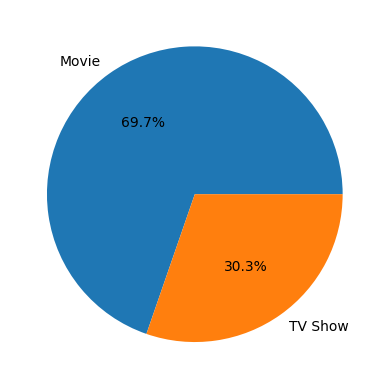

In [ ]:
#Disteibution of content across different types
types = df.groupby(['type'])['show_id'].count()
plt.pie(types, labels = types.index, autopct = '%1.1f%%')

The content for movies is around 70% and for Tv Shows it is 30%

In [ ]:
#TV Shows/Movies added on netflix each year
d = df.groupby(['year_added', 'type'])['show_id'].count().reset_index()
d.rename({'show_id': 'count of Movies/TV Shows'}, axis = 1, inplace = True)

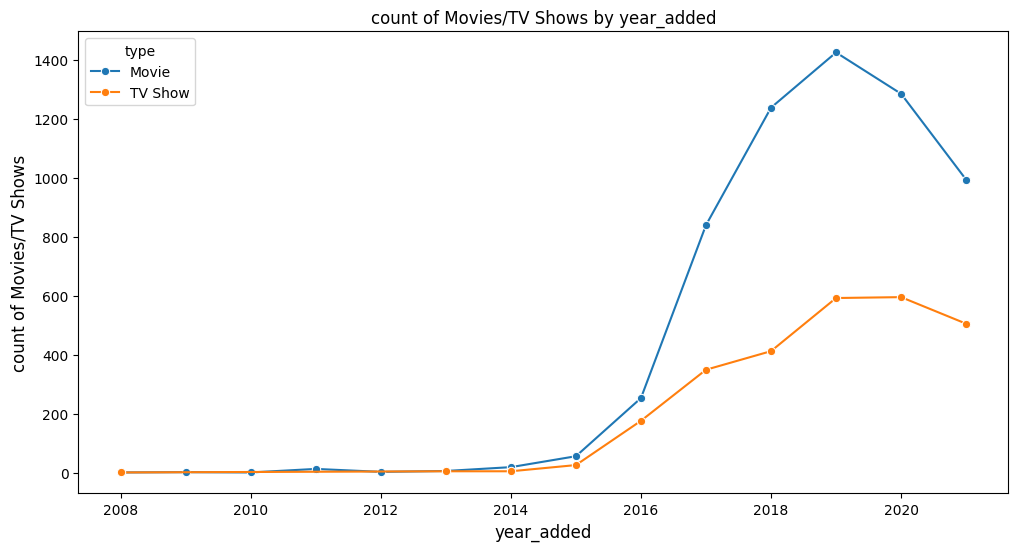

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(data = d, x = 'year_added', y = 'count of Movies/TV Shows', hue = 'type', marker = 'o')
plt.xlabel('year_added', fontsize = 12)
plt.ylabel('count of Movies/TV Shows', fontsize = 12)
plt.title('count of Movies/TV Shows by year_added', fontsize = 12)
plt.show()

Observation:
* The content added on the Netflix increased significantly after 2015.
*   2019 marks the highest number of movies and TV shows added on the Netflix.
*   Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic. But still , TV shows content have not dropped as significantly as the movies. In recent years TV shows are focussed more than Movies.



In [ ]:
#Distribution of Release Year Column
d = df.groupby(['release_year', 'type'])['show_id'].count().reset_index()
d.rename({'show_id' : 'count of Movies/TV Shows'}, axis = 1, inplace = True)

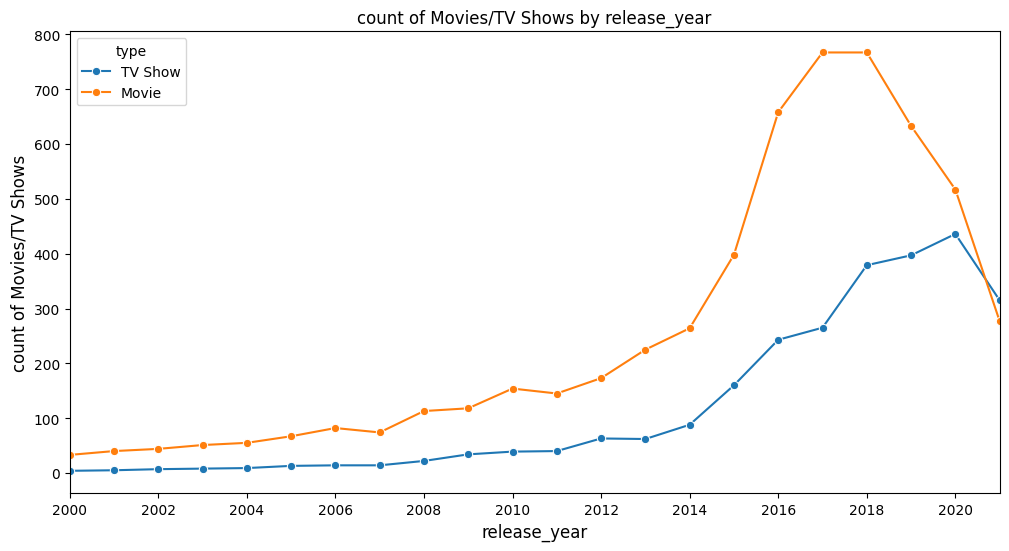

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(data = d, x = 'release_year', y = 'count of Movies/TV Shows', hue = 'type', marker = 'o')
plt.xlabel('release_year', fontsize = 12)
plt.ylabel('count of Movies/TV Shows', fontsize = 12)
plt.title('count of Movies/TV Shows by release_year', fontsize = 12)
plt.xlim(left = 2000, right = 2021)
plt.xticks(np.arange(2000, 2021, 2))
plt.show()

Observation:
*   2018 marks the highest number of movie releases while 2020 shows the highest number of TV Shows releases
*   This shows us that netflix is focusing more on TV Shows rather than Movies
*   We can also that there is an uptake in content releases after 2014 majorly





In [ ]:
#Count of Movies/TV Shows by top 10 directors
top10_dir = dir_tb['director'].value_counts().head(10).index
d = dir_tb.loc[dir_tb['director'].isin(top10_dir)]

<ipython-input-349-99dfe89779f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = d, y = 'director', order = top10_dir, palette='Set2')


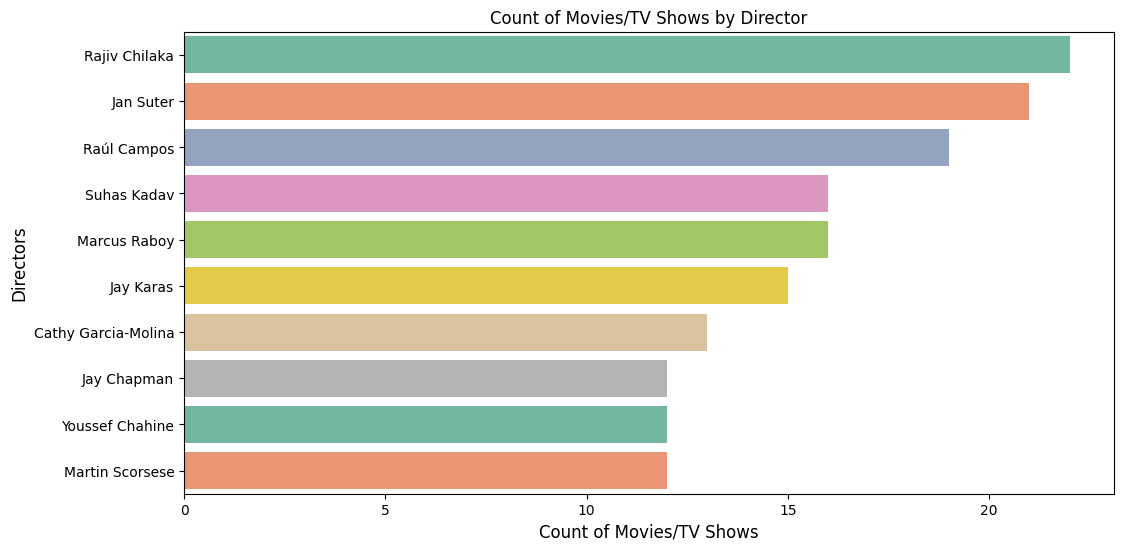

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data = d, y = 'director', order = top10_dir, palette='Set2')
plt.xlabel('Count of Movies/TV Shows', fontsize = 12)
plt.ylabel('Directors', fontsize = 12)
plt.title('Count of Movies/TV Shows by Director')
plt.show()

Observation:

The top 3 Movies/TV Shows director on netflix are Rajiv Chilaka, Jan Suter, Raúl Campos

Count of Movies/TV Shows for top 10 countries

In [ ]:
top10_country = country_db.country.value_counts().head(10).index
d = country_db.loc[country_db['country'].isin(top10_country)]

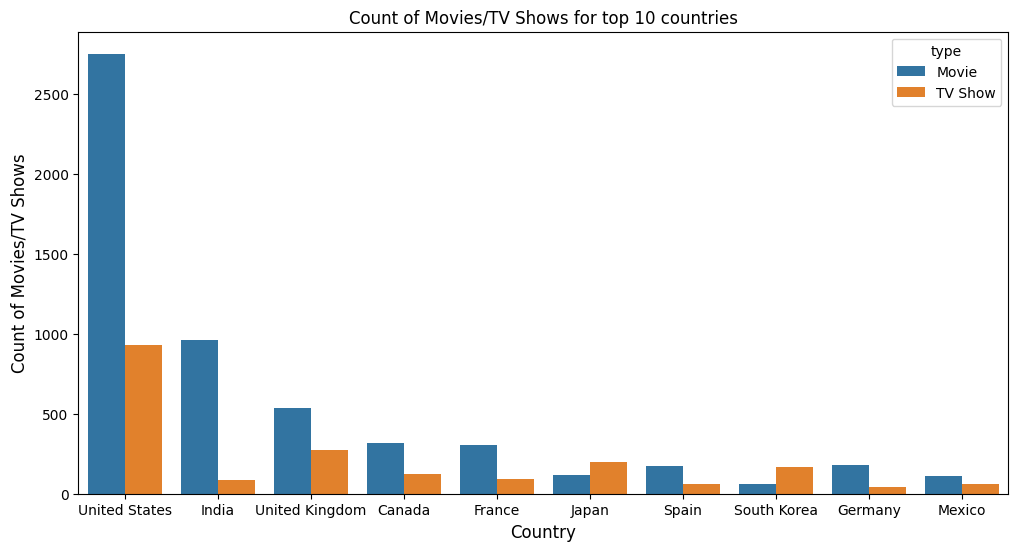

In [ ]:
plt.figure(figsize = (12,6))
sns.countplot(data = d, x = 'country', order = top10_country, hue = 'type')
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Count of Movies/TV Shows', fontsize = 12)
plt.title('Count of Movies/TV Shows for top 10 countries', fontsize = 12)
plt.show()

We can see that United States has the highest amount of Movies and TV Shows on netflix, and then India comes second to it.

Let's see the content in these countries in the form of proportions

In [ ]:
country_db['Proportion'] = country_db['country'].apply(lambda x: x if x in top10_country else 'Other Countries')
d = country_db['Proportion'].value_counts()

<ipython-input-352-2a6f17e87077>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_db['Proportion'] = country_db['country'].apply(lambda x: x if x in top10_country else 'Other Countries')


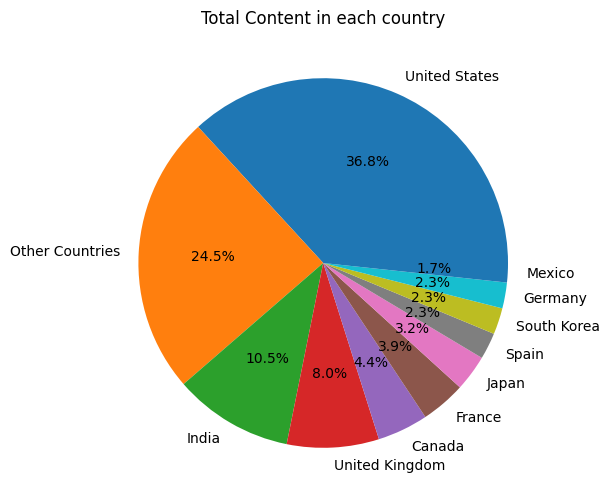

In [ ]:
plt.figure(figsize = (12,6))
plt.pie(d, labels = d.index, autopct='%1.1f%%')
plt.title('Total Content in each country')
plt.show()

1.   United States has the highest content on netflix, which is followed by India and United Kingdom
2.   75% of the content is contributed by top 10 countries, while 25% is contributed by Other countries




Movies/TV Shows distribution by rating

In [ ]:
m = movies.rating.value_counts()

t = tv_shows.rating.value_counts()

In [ ]:
#Removing the least occuring values from the rating
m = movies.loc[~movies.rating.isin(['Not Available' , 'NC-17' , 'TV-Y7-FV'])]
m = m.rating.value_counts()
t = tv_shows.loc[~tv_shows.rating.isin(['Not Available' , 'R' , 'NR', 'TV-Y7-FV'])]
t = t.rating.value_counts()
m,t

(rating
 TV-MA    2062
 TV-14    1427
 R         797
 TV-PG     540
 PG-13     490
 PG        287
 TV-Y7     139
 TV-Y      131
 TV-G      126
 NR         78
 G          41
 Name: count, dtype: int64,
 rating
 TV-MA    1143
 TV-14     730
 TV-PG     321
 TV-Y7     194
 TV-Y      175
 TV-G       94
 Name: count, dtype: int64)

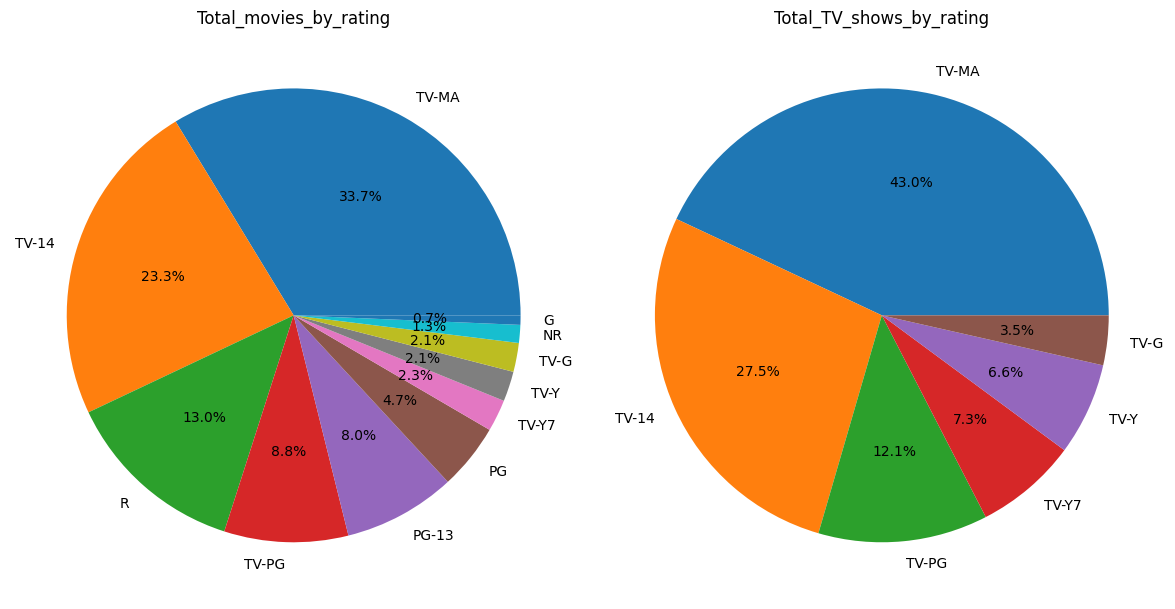

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].pie(m , labels = m.index, autopct='%1.1f%%')
ax[0].set_title('Total_movies_by_rating')

ax[1].pie(t , labels = t.index, autopct='%1.1f%%')
ax[1].set_title('Total_TV_shows_by_rating')

plt.tight_layout()
plt.show()

Observation:
Most of the movies on netflix are rated as TV-MA, followed by TV-14

Movies/TV Show distribution by duration

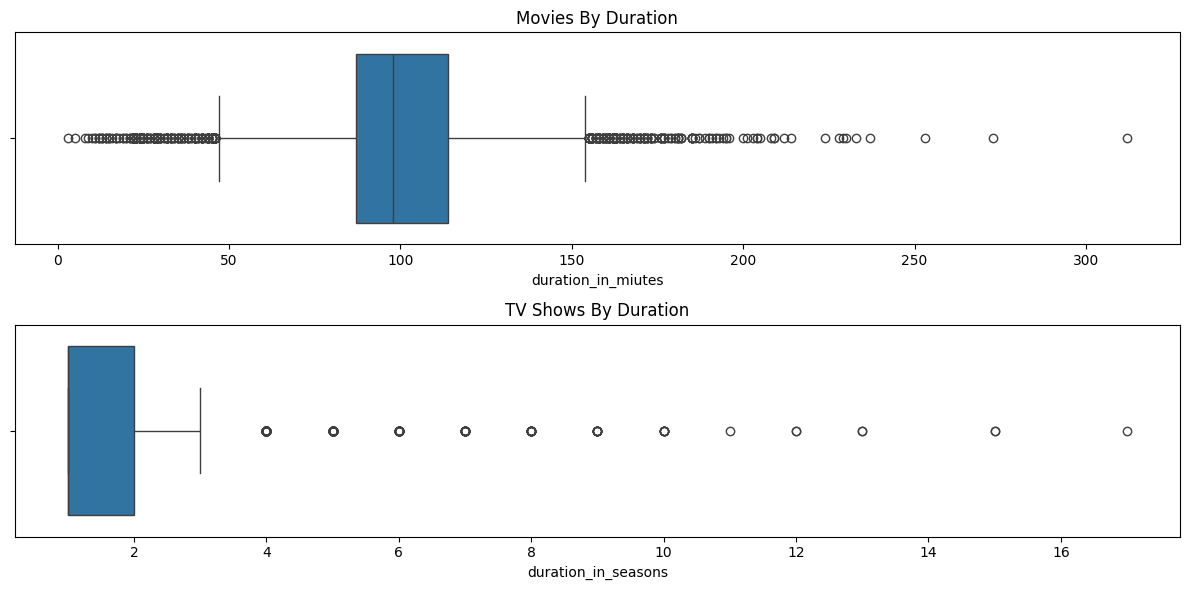

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (12,6))

sns.boxplot(data = movies, x = 'duration_in_minutes', ax = ax[0])
ax[0].set_xlabel('duration_in_miutes')
ax[0].set_title('Movies By Duration')
sns.boxplot(data = tv_shows, x = 'duration_in_seasons', ax = ax[1])
ax[1].set_xlabel('duration_in_seasons')
ax[1].set_title('TV Shows By Duration')
plt.tight_layout()
plt.show()

Observation:
We can see that in Movies, most of the movies had 50 to 150 minutes of time range, and TV Shows have 1-3 seasons as season range excluding potential outliers which are lying outise the whiskers of the plot

Total Movies/TV Shows by top 10 Genres

In [ ]:
listed_tb.head()

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
1,s2,TV Show,TV Dramas
1,s2,TV Show,TV Mysteries
2,s3,TV Show,Crime TV Shows


In [ ]:
top10movies_genres = listed_tb[listed_tb['type'] == 'Movie'].listed_in.value_counts().head(10).index
top10tvshows_genres = listed_tb[listed_tb['type'] == 'TV Show'].listed_in.value_counts().head(10).index

In [ ]:
top10movies_df = listed_tb.loc[listed_tb['listed_in'].isin(top10movies_genres)]

In [ ]:
top10tvshows_df = listed_tb.loc[listed_tb['listed_in'].isin(top10tvshows_genres)]

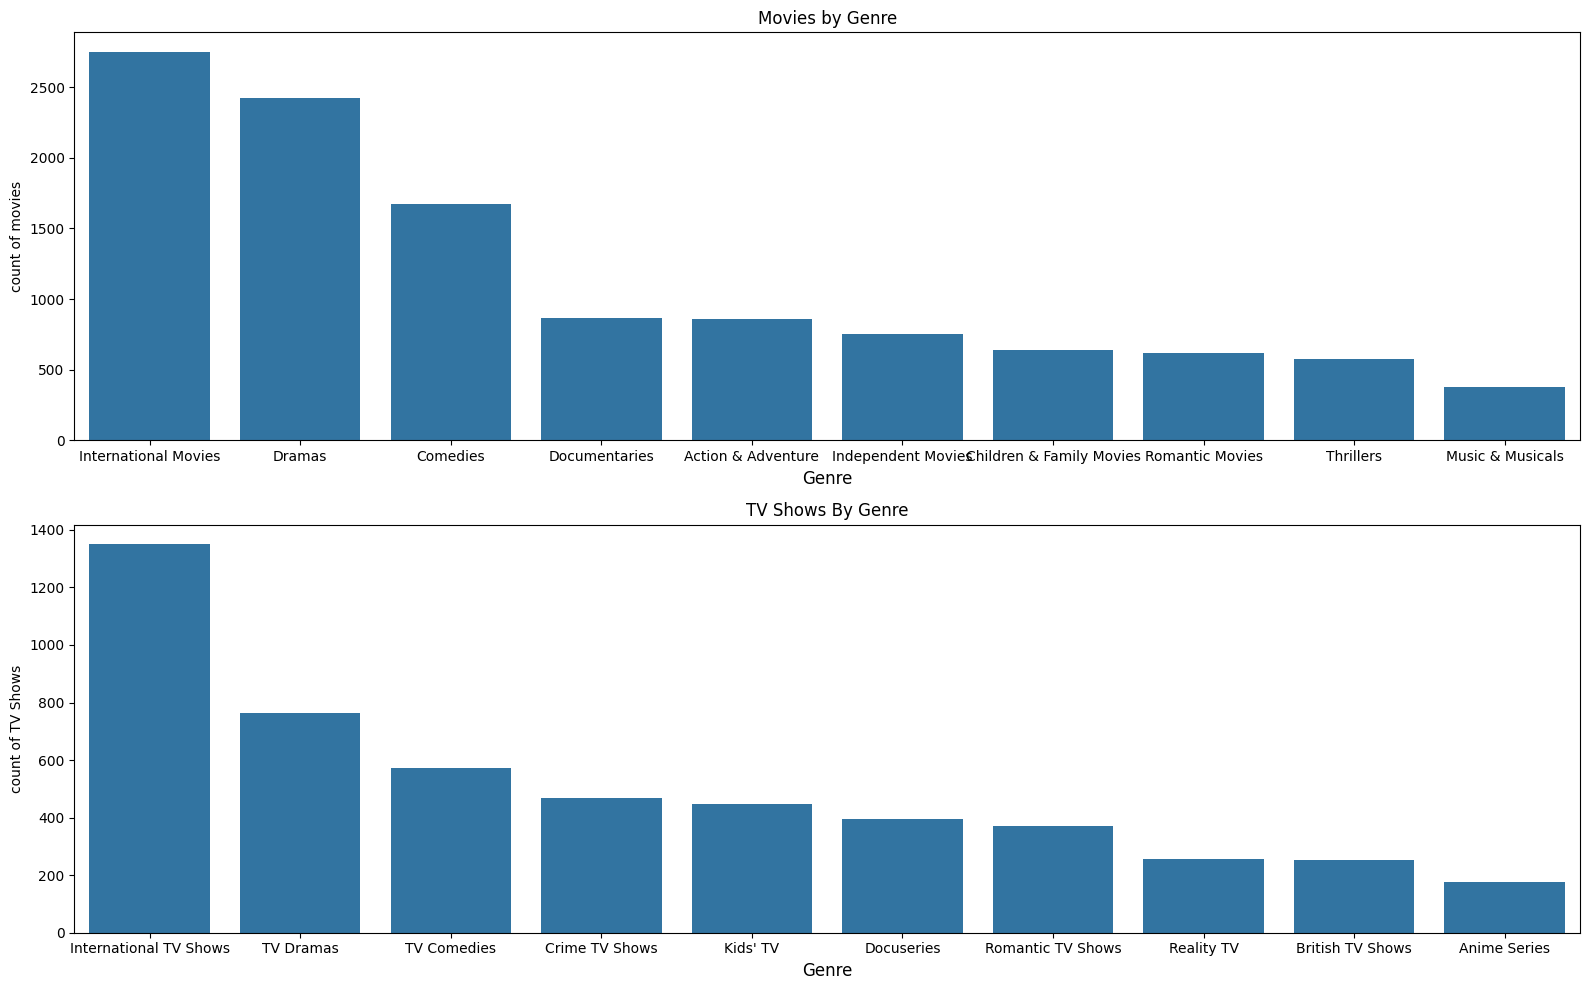

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (16,10))
sns.countplot(data = top10movies_df, x = 'listed_in', order = top10movies_genres, ax = ax[0])
ax[0].set_xlabel('Genre', fontsize = 12)
ax[0].set_ylabel('count of movies')
ax[0].set_title('Movies by Genre')
sns.countplot(data = top10tvshows_df, x = 'listed_in', order = top10tvshows_genres, ax = ax[1])
ax[1].set_xlabel('Genre', fontsize = 12)
ax[1].set_ylabel('count of TV Shows')
ax[1].set_title('TV Shows By Genre')
plt.tight_layout()
plt.show()

International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.

<Axes: xlabel='year_added', ylabel='show_id'>

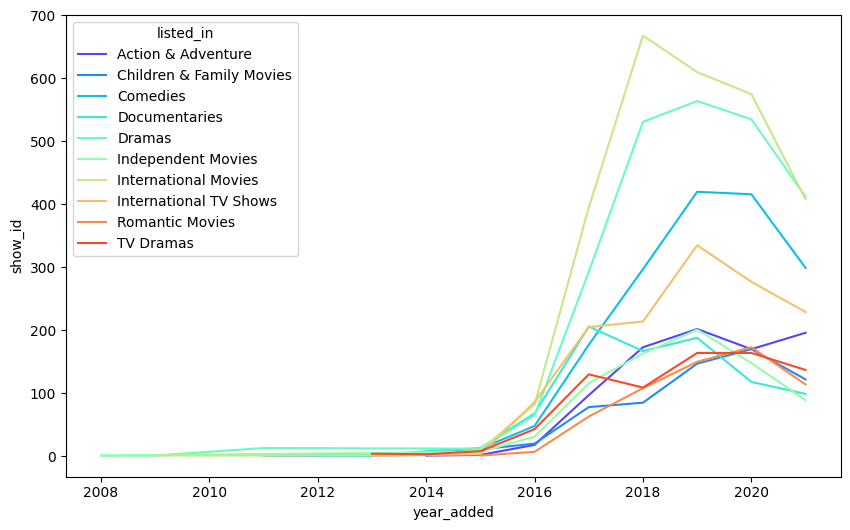

In [ ]:
#Which genres are picking up with the time
genre_list = listed_tb.listed_in.value_counts().head(10).index
top10_genres = listed_tb.loc[listed_tb['listed_in'].isin(genre_list)]
genre_year = top10_genres.merge(df , on = 'show_id')[['show_id','listed_in_x' ,'type_x' , 'year_added' ]]
genre_year.columns = ['show_id', 'listed_in', 'type', 'year_added']
genre_year = genre_year.groupby(['listed_in' , 'year_added'])['show_id'].count().reset_index()
plt.figure(figsize = (10,6))
sns.lineplot(data = genre_year , x = 'year_added' , y = 'show_id' , hue = 'listed_in' , palette ='rainbow' )

While we can see that all of the genres are facing decline around year 2020, there is one genre that stands out is Actiona and Adventure

Total movies/TV Shows distribution by release year

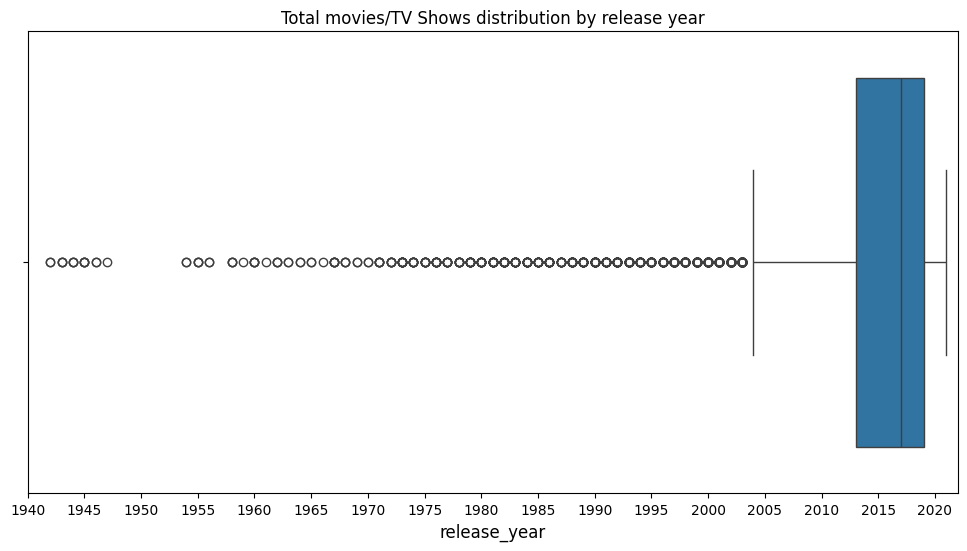

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(data = df, x = 'release_year')
plt.xlabel('release_year', fontsize = 12)
plt.title('Total movies/TV Shows distribution by release year', fontsize = 12)
plt.xlim(left = 1940, right = 2022)
plt.xticks(np.arange(1940,2022,5))
plt.show()

1.   Major content was released on the netflix around year 2005-2021
2.   Very Few content was release before 2005




#Visual Analysis (Bivariate)

In [ ]:
#Popular Genres in top 10 countires through heatmaps
top10_country = country_db.country.value_counts().head(10).index
top10_country = country_db.loc[country_db['country'].isin(top10_country)]

In [ ]:
d = top10_country.merge(listed_tb, on = 'show_id').drop_duplicates()
country_genre = d.groupby(['country', 'listed_in'])['show_id'].count().sort_values(ascending = False).reset_index()
country_genre = country_genre.pivot(index = 'listed_in', columns = 'country', values = 'show_id')

Text(0.5, 1.0, 'Countires v/s Genres')

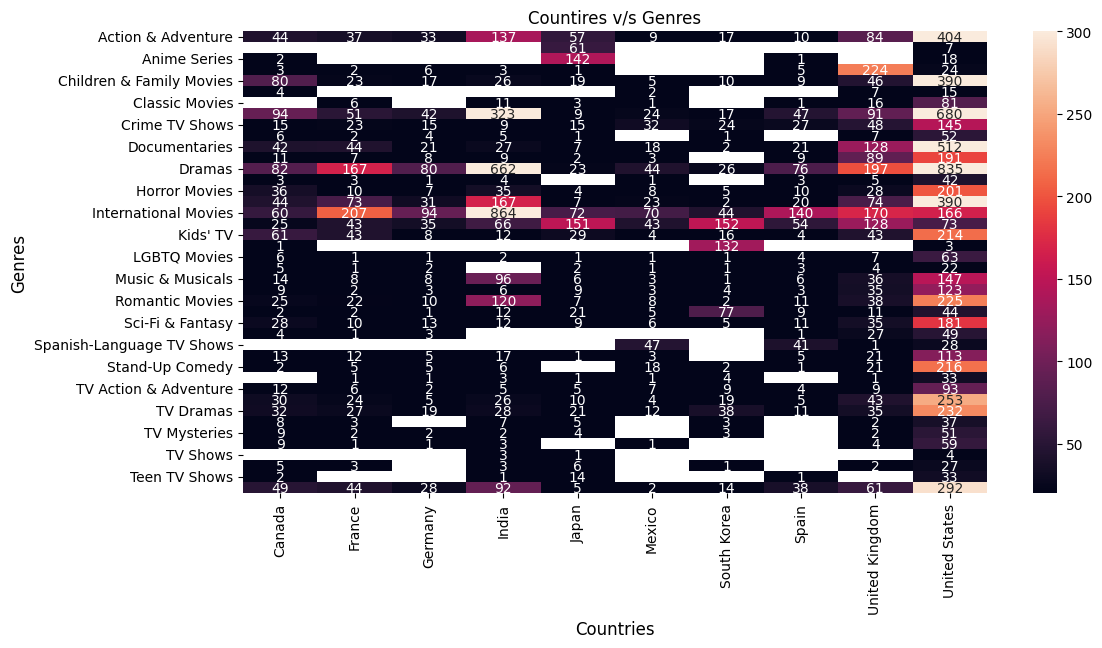

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(data = country_genre, annot = True, fmt = ".0f", vmin = 20, vmax = 300)
plt.xlabel('Countries', fontsize = 12)
plt.ylabel('Genres', fontsize = 12)
plt.title('Countires v/s Genres', fontsize = 12)

1.   Maximum number of International Movies are produced in India

2.   United States has a good mix of all the Genres
3. Maximum number of Dramas related content is produced in UNited States






In [ ]:
#Country wise rating of content
x = top10_country.merge(df, on = 'show_id').groupby(['country_x', 'rating'])['show_id'].count().reset_index()

In [ ]:
country_rating = x.pivot(index = 'rating', columns = 'country_x', values = 'show_id')

Text(0.5, 1.0, 'Countries v/s Rating')

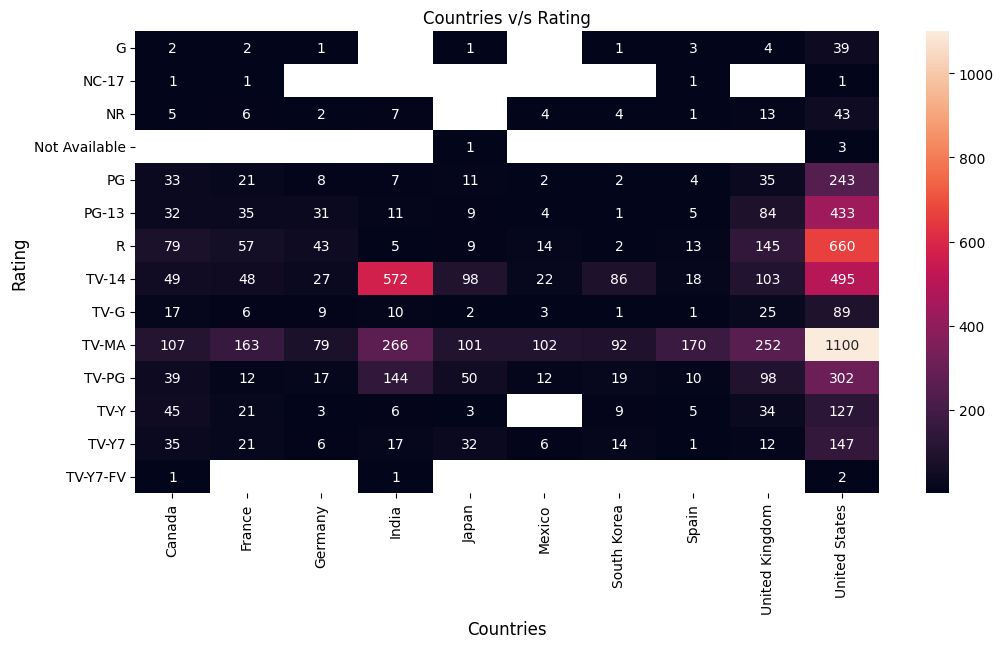

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(data = country_rating, annot = True, fmt = ".0f")
plt.xlabel('Countries', fontsize = 12)
plt.ylabel('Rating', fontsize = 12)
plt.title('Countries v/s Rating', fontsize = 12)



1.   United States has the highest number of TV-MA rated content and in overall countries this trend follows
2.   US has content in all of the ratings
3. There is not much content under rating G and TV-G across all countires except US
4. India has most content under TV-14 rating



In [ ]:
#Top 5 Actors by top 5 countries
d = cast_tb.merge(country_db, on = 'show_id').drop_duplicates()
d = d.groupby(['country', 'cast'])['show_id'].count().reset_index()

In [ ]:
country_list = d['country'].value_counts().head(6).index
country_list = country_list[1:]

In [ ]:
top5_actors = d.loc[d['country'].isin(['United States'])].sort_values('show_id', ascending = False).head(5)
for i in country_list:
  new = d.loc[d['country'].isin([i])].sort_values('show_id', ascending = False).head(5)
  top5_actors = pd.concat([top5_actors, new], ignore_index= True)
top5_actors

,country,cast,show_id
0,United States,Tara Strong,22
1,United States,Samuel L. Jackson,22
2,United States,Fred Tatasciore,21
3,United States,Adam Sandler,20
4,United States,James Franco,19
5,India,Anupam Kher,40
6,India,Shah Rukh Khan,34
7,India,Naseeruddin Shah,31
8,India,Om Puri,29
9,India,Akshay Kumar,29


<Axes: xlabel='show_id', ylabel='cast'>

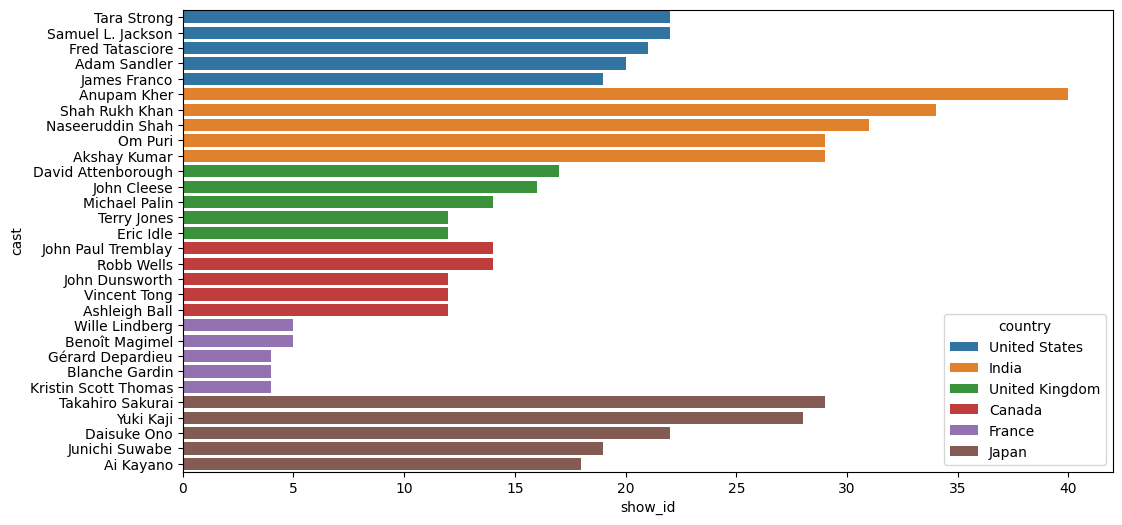

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(data = top5_actors, y = 'cast', x = 'show_id', hue = 'country')

Indian actors has more movies and tv shows than any country

In [ ]:
#Months where maximum content was added on netflix
month_year = df.groupby(['month_added', 'year_added'])['show_id'].count().reset_index()

Text(0.5, 1.0, 'Year wise shows on Netflix')

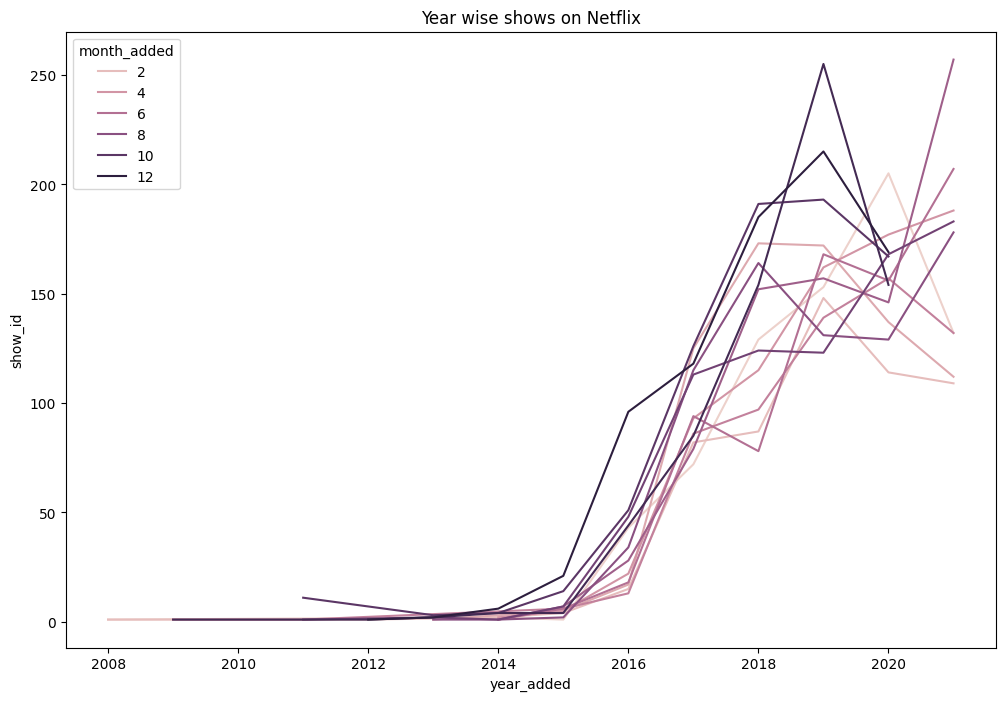

In [ ]:
plt.figure(figsize = (12,8))
sns.lineplot(data = month_year, x = 'year_added', y = 'show_id', hue = 'month_added')
plt.title('Year wise shows on Netflix')

1. The addition of shows increased after 2015 until 2020 because of covid
2. We can see that maximum number of shows are included in netflix around the months of October - December as it's a festive season in most of the countires.

(0.0, 225.0)

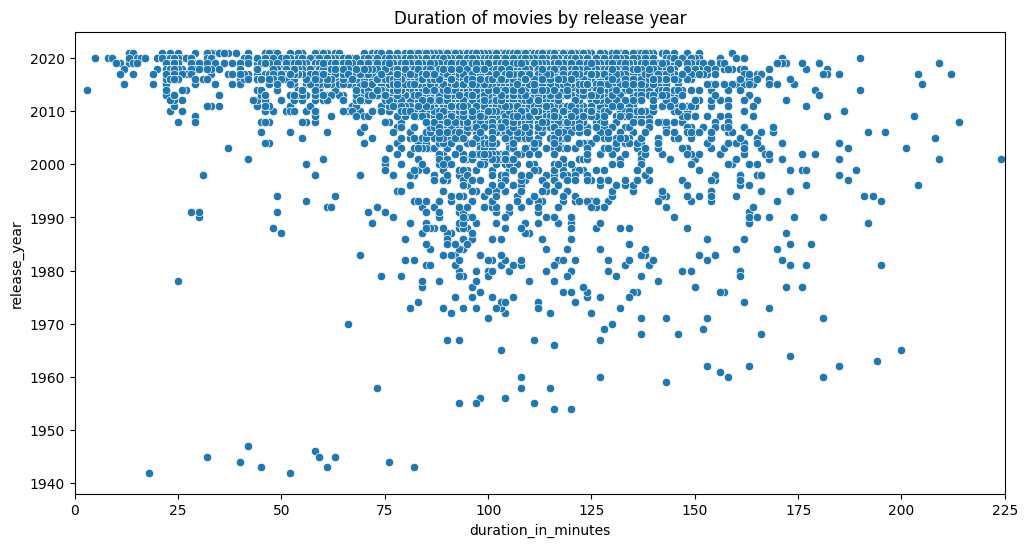

In [ ]:
#Distribution of movies duration by release year
plt.figure(figsize = (12,6))
sns.scatterplot(data = movies, x = movies['duration_in_minutes'], y = movies['release_year'])
plt.title('Duration of movies by release year', fontsize = 12)
plt.xlim((0,225))

1. We can see that movies shorter than 75 minutes are increased from year 2010
2. Movies greater than 75 minutes and shorter than 150 minutes are increased from year 2000

#Business insights based on Non-Graphical and Visual Analysis

1. Around 70% content on Netflix is Movies and around 30% content is TV shows.
2. The movies and TV shows uploading on the Netflix started from the year 2008, It had very lesser content till 2014.
3. 2015 marks the significant surge point in the content getting uploaded on Netflix. It continues the uptrend since then and 2019 marks the highest number of movies and TV shows added on the Netflix. Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic. But still , TV shows content have not dropped as drastic as movies.
4. Netflix has movies from total 122 countries, United States being the highset contributor with almost 37% of all the content.
5. Since 2018, A drop in the movies is seen , but rise in TV shows is observed clearly. Being in continuous uptrend , TV shows surpassed the movies count in mid 2020. It shows the rise in popularity of tv shows in recent years.
6. Netflix has movies from variety of directors. Around 4993 directors have their movies or tv shows on Netflix.
7. The release year for shows is concentrated in the range 2005-2021.
50 mins - 150 mins is the range of movie durations, excluding potential outliers.
8. 1-3 seasons is the range for TV shows seasons, excluding potential outliers.
9.  Different kinds of ratings of content is avaialble on netfilx, for the various viewers categories like kids, adults , families. Highest number of movies and TV shows are rated TV-MA (for mature audiences).
10. Content in most of the ratings is available in lesser quanitity except in US. Ratings like TV-Y7 , TV-Y7 FV , PG ,TV-G , G , TV-Y , TV-PG are very less avaialble in all countries except US.
11. International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.
12. Indian Actors have been acted in maximum movies on netflix. Top 5 actors are in India based on quantity of movies.
13. Shorter duration movies have been popular from 2010.


#Recommendations
1. Netflix is serving content mostly in 3 types of content rating which is mostly for adult audience except US. Netflic can try producing content in various rating which will suit to young audience as well.
2. India has substantial young population, so they can cater to produce content for young audiences as well.
3. Similar in case of Japan the maximum content is of TV-MA, TV-PG, TV-14, it has a significant population of age above 60 years, so it can produce content which will cater them
4. Netflix should produces movies with an avg duration of 50 - 150 minutes as the data suggests that most number of movies are in this range.
5. Netflix can start focusing on the genre Action and Adventure as all the other genres are facing the decline Action and Adventure genre is picking up as the time passes

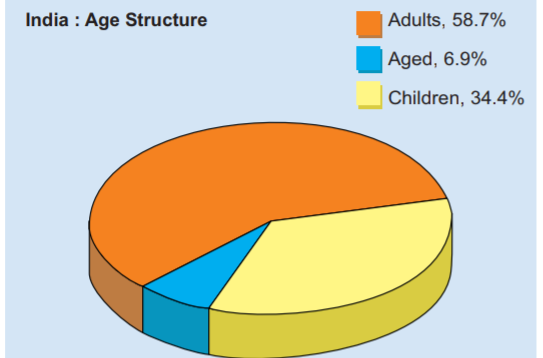


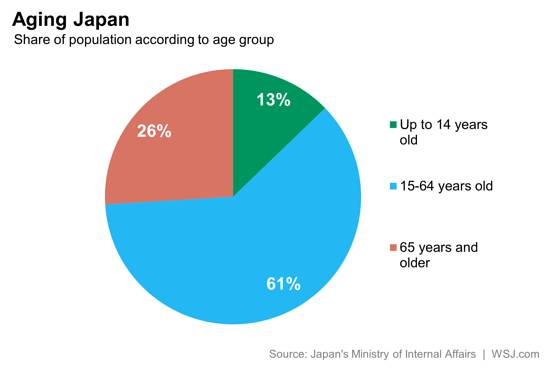